In [1]:
import pandas as pd
data_dir = ""
bordeaux_df = pd.read_csv("bordeaux.csv",index_col="year")
bordeaux_df.head()

,price,summer,har,sep,win,age
year,,,,,,
1952,37.0,17.1,160,14.3,600,40
1953,63.0,16.7,80,17.3,690,39
1955,45.0,17.1,130,16.8,502,37
1957,22.0,16.1,110,16.2,420,35
1958,18.0,16.4,187,19.1,582,34


Here, I fit a linear regression model that predicts the price of a home (**SalePrice**) using square footage (**Gr Liv Area**) as the only feature. Then, I make a graph of the fitted model (this is possible because there is only one feature in this model). There is another way to graph a fitted linear regression model: extract the intercept and coefficient and draw a line with that intercept and slope. I verify that this gives the same graph.

Intercept (c): 13289.63436475955
Slope (m): 111.69400085780036


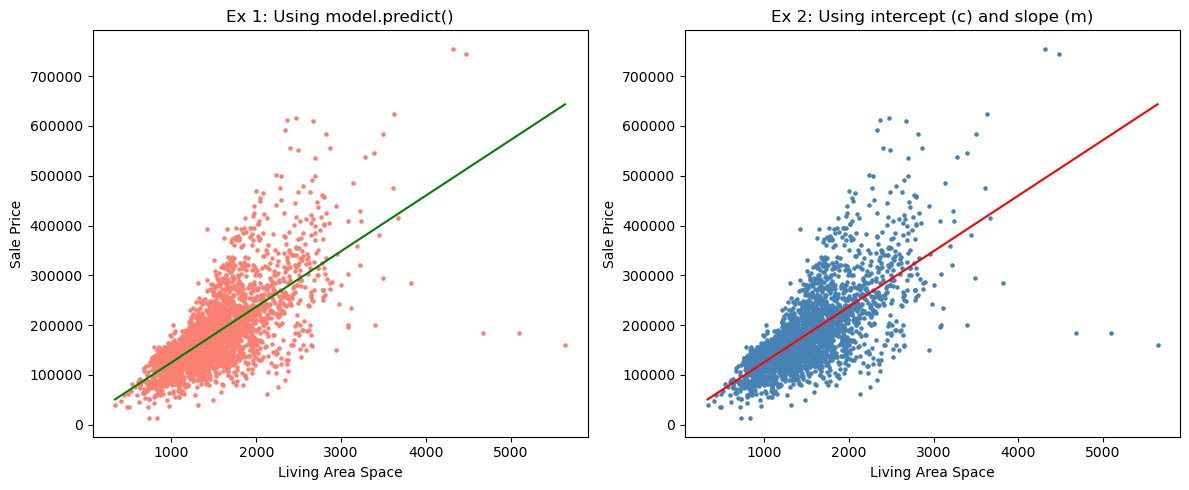

In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read Ames housing data which is tab separated
ames_df = pd.read_csv('AmesHousing.txt', sep='\t')

# Set up the features (x) and target (y)
X_train = ames_df[['Gr Liv Area']]
y_train = ames_df["SalePrice"]

# Declare and fit the model
linreg_model = LinearRegression()
linreg_model.fit(X=X_train, y=y_train)

# Extract the intercept (c) and slope (m) for the line y=mx+c
c = linreg_model.intercept_
m = linreg_model.coef_[0]
print(f'Intercept (c): {c}')
print(f'Slope (m): {m}')

# ---- Side by side plots ------
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))

# First plot - fitted line using model.predict()
ax1.scatter(ames_df["Gr Liv Area"], ames_df['SalePrice'], s=5, color='salmon')
y_pred = linreg_model.predict(X_train)
order = ames_df['Gr Liv Area'].values.argsort()
ax1.plot(ames_df['Gr Liv Area'].values[order], y_pred[order], color='green')
ax1.set_xlabel('Living Area Space')
ax1.set_ylabel('Sale Price')
ax1.set_title('Ex 1: Using model.predict()')

# Second plot - fitted line using the slope and intercept
ax2.scatter(ames_df["Gr Liv Area"], ames_df['SalePrice'], s=5, color='steelblue')
x_sorted = ames_df['Gr Liv Area'].sort_values()
y_manual = m * x_sorted + c     # y = m * x + c
ax2.plot(x_sorted.values, y_manual, color='red')
ax2.set_xlabel('Living Area Space')
ax2.set_ylabel('Sale Price')
ax2.set_title('Ex 2: Using intercept (c) and slope (m)')

plt.tight_layout()
plt.show()

I fit a linear regression model that predicts the price of a home using square footage, number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), and number of half bathrooms (**Half Bath**). Interpret the coefficients. Then, I use my fitted model to predict the price of a home that is 1500 square feet, with 3 bedrooms, 2 full baths, and 1 half bath.

In [5]:
# Set up the features (x) and the target (y)
X_train = ames_df[['Gr Liv Area', 'Bedroom AbvGr', 'Full Bath', 'Half Bath']]
y_train = ames_df["SalePrice"]

# Print out the intercept and coefficients for each 
linreg_model = LinearRegression()
linreg_model.fit(X=X_train, y=y_train)
print(f'Intercept: {linreg_model.intercept_}')

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": linreg_model.coef_
})
print(f'Coefficients: {coefficients}\n')

# Predict the price for : 1500 sq ft, 3 bedrooms, 2 full baths and 1 half bath
X_predict = pd.DataFrame({"Gr Liv Area": [1500],
                            "Bedroom AbvGr": [3],
                            "Full Bath": [2], 
                            "Half Bath": [1]
                            })

# Do a prediction on X_predict for the Price of the house
predict_price = linreg_model.predict(X_predict)
print(f'Predicted price: {predict_price}')

Intercept: 46942.32081992374
Coefficients:          Feature   Coefficient
0    Gr Liv Area    118.099868
1  Bedroom AbvGr -29994.956760
2      Full Bath  26728.533428
3      Half Bath   1271.138477

Predicted price: [188835.45844693]


I want to predict how much a male diner will tip on a Sunday bill of $40.00, so I fit a linear regression model to the tips data to answer this question. 

In [7]:
# Read the data
df = pd.read_csv("tips.csv")

# Convert categorical data to quantitative variables using pd.get_dummies()
df = pd.get_dummies(df, drop_first = True)

# Set up the features (everything except abs and tip) and target
X_train = df.drop(columns = ["obs", "tip"])
y_train = df["tip"]

# Fit the model
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

# Print the coefficients
print(f'Intercept: {linreg_model.intercept_}')

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": linreg_model.coef_
})
print(f'Coefficients: {coefficients}\n')


# Predict: male diner, Sunday, $40 bill
X_predict = pd.DataFrame({
    "totbill": [40],
    "size" : [2],
    "sex_M" : [1],
    "smoker_Yes" : [0],
    "day_Sat" : [0],
    "day_Sun" : [1],
    "day_Thu" : [0],
    "time_Night" : [0]
})
    
predict_tip = linreg_model.predict(X_predict)
print(f'Predicted tip for how much a male diner will tip on a Sunday bill of $40.00: {predict_tip}')


Intercept: 0.8719458840387309
Coefficients:       Feature  Coefficient
0     totbill     0.094487
1        size     0.175992
2       sex_M    -0.032441
3  smoker_Yes    -0.086408
4     day_Sat    -0.121458
5     day_Sun    -0.025481
6     day_Thu    -0.162259
7  time_Night    -0.068129

Predicted tip for how much a male diner will tip on a Sunday bill of $40.00: [4.94548853]


I fit a linear regression model, with no intercept, that predicts the tip from the total bill. I then plot the data and the fitted model. 

c: [0.1437319]


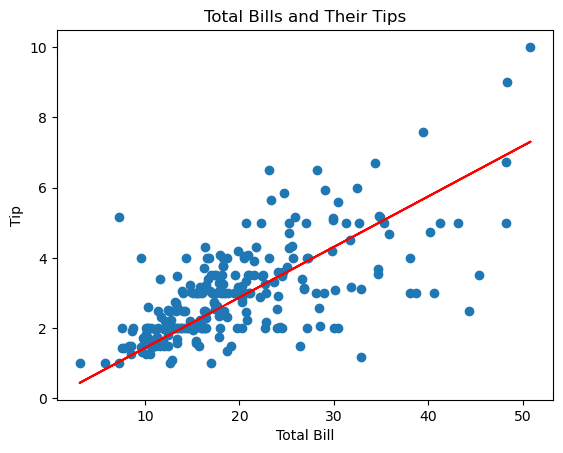

In [9]:
# Read the data
df = pd.read_csv("tips.csv")

# Set up the features (everything except abs and tip) and target
X_train = df[["totbill"]]
y_train = df["tip"]

# Fit the model
linreg_model = LinearRegression(fit_intercept = False)
linreg_model.fit(X_train, y_train)
c = linreg_model.coef_
print(f'c: {c}')

plt.scatter(X_train, y_train)
y_predict = linreg_model.predict(X_train)
plt.plot(X_train, y_predict, color = "red")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bills and Their Tips")
plt.show()

